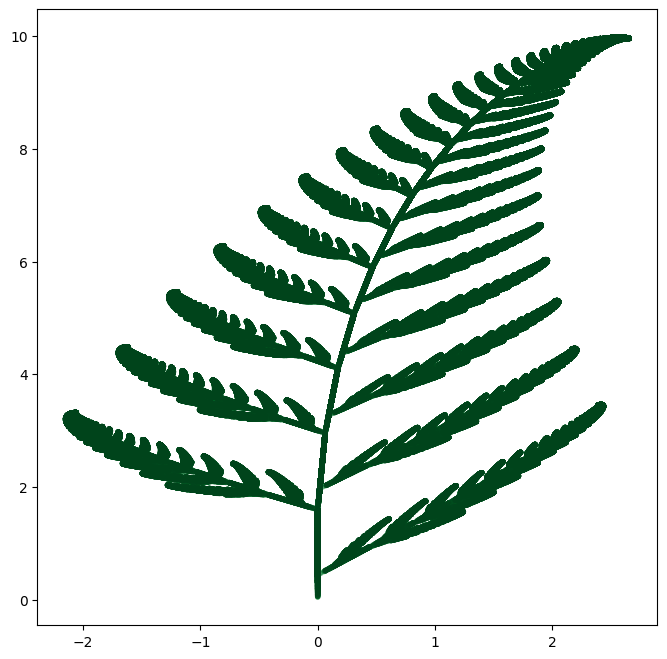

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from numba import njit
plt.rcParams["figure.figsize"] = (8, 8)
@njit(fastmath=True) 

def barnsley(t):
    x = []
    y = []
    xn = 0
    yn = 1
    i = 0
    r= np.random.uniform(0,1,t)
    n = []
    while i <t:
        if r[i]<0.01:  
            xn = 0
            yn = 0.16*yn
        elif r[i]<0.86:
            xn = 0.85*xn + 0.04*yn
            yn = -0.04*xn + 0.85*yn + 1.6
        elif r[i]<0.93:
            xn = 0.2*xn - 0.26*yn
            yn = 0.23*xn + 0.22*yn + 1.6
        else:
            xn = -0.15*xn + 0.28*yn
            yn = 0.26*xn + 0.24*yn + 0.44
        n.append(i)
        x.append(xn)
        y.append(yn)
        i += 1
    return x,y,n
#barnsley(10)
x, y, n = barnsley(10000000)
print()
plt.scatter(x,y,marker='.',s = 0.1 c=n, cmap = 'Greens', alpha=0.4)

In [ ]:
r= np.random.uniform(0,1,2000)
print(min(r),max(r))

In [ ]:
import random
import tkinter as tk
width, height = 1024, 1024
pixels = [0] * (width * height)

x, y = 0, 1
for n in range(60 * width * height):

    r = random.random() * 100
    xn, yn = x, y
    if r < 1:
        x = 0
        y = 0.16 * yn
    elif r < 86:
        x = 0.85 * xn + 0.04 * yn
        y = -0.04 * xn + 0.85 * yn + 1.6
    elif r < 93:
        x = 0.20 * xn - 0.26 * yn
        y = 0.23 * xn + 0.22 * yn + 1.6
    else:
        x = -0.15 * xn + 0.28 * yn
        y = 0.26 * xn + 0.24 * yn + 0.44

    x_pix = int(width * (0.45 + 0.195 * x))
    y_pix = int(height * (1 - 0.099 * y ))
    pixels[x_pix + y_pix * width] += 1

greys = [ max(0, (256 - p) / 256) for p in pixels]
colors = [int(c * 255) for g in greys for c in [g ** 6, g, g ** 6]]
root = tk.Tk()
p6header = bytes("P6\n{} {}\n255\n".format(width, height), "ascii")
img = tk.PhotoImage(data=p6header + bytes(colors))
tk.Label(root, image=img).pack()
img.write("barnsley-fern.png", format='png')
tk.mainloop()